## What is Fractional Cover? [[1, 2](#References)]

The Landsat Fractional Cover product stored in DEA is at 25m x 25m resolution (the same as the Landsat surface reflectance products).

Fractional Cover represents the proportion of the land surface
that is bare (BS), covered by photosynthetic vegetation (PV), or non-photosynthetic vegetation (NPV). 

The Fractional Cover product was generated using the spectral unmixing algorithm developed by the Joint Remote Sensing Research Program (JRSRP) [[2](#References)] which used the spectral signature for each pixel to break it up into three fractions, based on field work that determined the spectral characteristics of these fractions. [[1](#References)]The fractions were retrieved by inverting multiple linear regression estimates and using synthetic endmembers in a constrained non-negative least squares unmixing model.[[1](#References)]

The green (PV) fraction includes leaves and grass, the non-photosynthetic fraction (NPV) includes branches, dry grass and dead leaf litter, and the bare soil (BS) fraction includes bare soil or rock.[[1](#References)]



### Fractional Cover Bands: [[1](#References)]

- **Bare Soil (bare ground, rock, disturbed) (BS):**  - Bare Ground (bare soil, rock) percentage; Digital Number 10000 = 100%

- **Photosythetic Vegetation. (green grass, trees, etc.) (PV):**  - Photosynthetic Vegetation: Green Vegetation percentage;Digital Number 10000 = 100%

- **Non-Photosythetic vegetation (litter, dead leaf and branches) (NPV):** - Non-Photosynthetic Vegetation (litter, dead leaves andbranches) percentage; Digital Number 10000 = 100%

- **Unmixing Error (UE):**  - Unmixing Error. The residual error, defined as the Euclidean Norm of the Residual Vector. High values express less confidence in the fractional components.
    
__No Data Values:__ Fractional cover contains no data values (-1)
we use the datacube storage function "masking.mask_invalid_data" to remove these from our data before using the data

### Limitations, Errors and Uncertainty:

__Water and soil moisture:__
Pixels over water may show incorrect values for Photosynthetic Vegetation. [[1](#References)] Water should be masked out, maybe by using WOfS or a water index. Soil moisture may affect the accuracy of the product [[1](#References)]. 

__Sums greater than 100%:__
"Occasionally the sum of the three components is not equal to 100%. Differences are usually small and are not rounded in order to preserve what may be useful seasonal indicators. "[[1](#References)]

__Similarity between Bare Soil and NPV:__
Model can perform badly on pixels where bare soil and NPV endmembers are similar. [[1](#References)]

__Compared to field data:__
"Based on the comparison with the field data the FC25 product has an overall Root Mean Squared Error (RMSE) of 11.8%. The error margins vary for the three different layers: green RMSE: 11.0%, non-green RMSE: 17.4% and bare RMSE: 12.5%" [[1](#References)]

### How to use this notebook

This note book has been designed to interogate fractional cover information stored on the public facing DEA (Digital Earth Australia). 

What capabilties are sampled.

    - ** User selects a case study area using the load case study app.
    - ** User then loads the interogate fractional cover app.
    - ** User able to export out into csv or excel an output containing interogated data.
    - ** User is able to export loaded case study as netcdf
        

The jupyter app allows users to draw a polygon or point over a case study display a stacked plot, and summarise data in a table. 



### To execute a cell - click on the cell and push cntrl + enter



In [1]:
%store -r

Macros have been loaded in to this environment and are essentially python code that builds app user interface, and code that uses the ODC python API to retrieve a datacube for interogation. The above command loads into the work space the apps that have been created.

### Load Data App.

This app has been designed to create an ODC query which requires, a geographical and temporal extent, coordinate system, spatial resolution and product name.

The app both communicates to a user about what is available in the ODC and also ensures users do not send queries that return empty cubes.

__Select Case Study:__
Please use the pan and zoom tools to find an area of interes and then select the rectangle draw tool from the toolbox panel and draw a rectangle over your desired case-study.


__Product Select:__
This tab displays all the products currently available with in the current ODC, please ensure there are available datasets available of the time range.

# For this notebook please select the ls8_fc_albers product.


In [2]:
load_data_cube

Accordion(children=(VBox(children=(Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', '…

## Fractional Cover App

Please use the draw point tool to select a single pixel region the tool will compile fractional cover information into a table and display a stacked graph over the time range selected.

Please use the draw polygon tool to select a region the tool will summarise fractional cover information then compile into a table and display a stacked graph over the time range selected.

Each interogation will be compiled into the same table but displayed on different graphs.

### This app also retrieves data from the public facing DEA before it loads. Do wait!!



Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


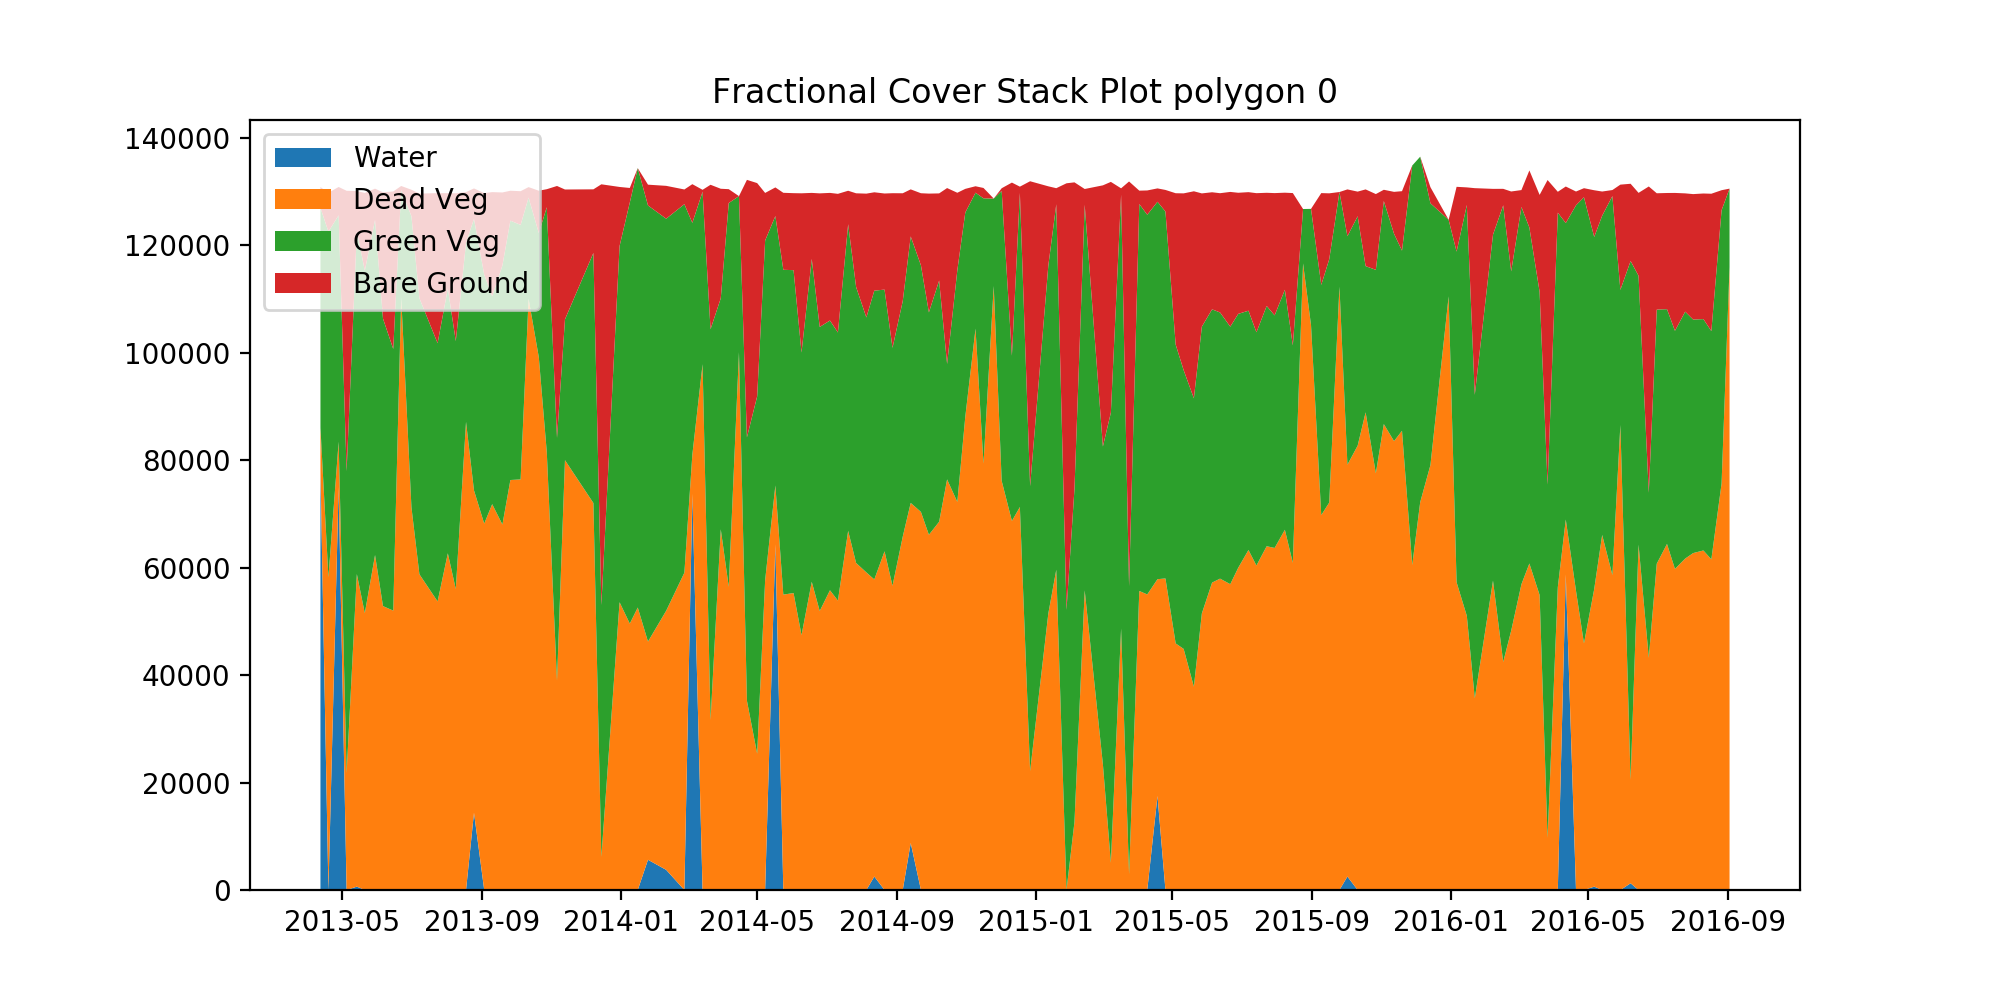

In [3]:
interogate_fractional_cover_app

Once this tool has run you are able to access the created objects

In [ ]:
print (ds) ###This is the data cube object.

In [5]:
print (output_pandas) ###This is the compiled table

                         BS_polygon 0  PV_polygon 0  NPV_polygon 0  \
time                                                                 
2013-04-03 02:01:34.000     21.725322     20.403433      56.914163   
2013-04-22 02:01:51.500      0.000000     12.030043      88.733906   
2013-04-29 02:08:01.500     73.686695     25.901288       0.467811   
2013-05-24 02:02:07.000     13.866953     23.369099      62.030043   
2013-05-31 02:08:19.000     38.403433     25.416309      35.905579   
2013-06-16 02:08:13.000     11.184549     24.330472      63.918455   
2013-06-25 02:02:00.500     16.025751     27.433476      55.351931   
2013-07-02 02:08:14.000     59.317597     21.210300      18.836910   
2013-07-11 02:02:04.000     13.214592     25.845494      60.072961   
2013-07-18 02:08:13.500     14.575107     25.459227      58.875536   
2013-07-27 02:02:03.500     13.901288     26.386266      58.729614   
2013-08-12 02:02:05.000      0.000000     16.454936      83.017167   
2013-08-19 02:08:17.

In [6]:
print (geoJSONs) # This is the shape drawn in GeoJSON IDs corresponding to the compiled table.

[{'type': 'Feature', 'properties': {'style': {'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0, 'clickable': True}, 'datasetID': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[116.638681, -34.432518], [116.637934, -34.431669], [116.637805, -34.430416], [116.636723, -34.429821], [116.637341, -34.42878], [116.639763, -34.428611], [116.641593, -34.428674], [116.642289, -34.429736], [116.64198, -34.431011], [116.640459, -34.431839], [116.638681, -34.432518]]]}}, {'type': 'Feature', 'properties': {'style': {'shapeOptions': {}, 'stroke': True, 'color': '#3388ff', 'weight': 4, 'opacity': 0.5, 'fill': True, 'fillColor': None, 'fillOpacity': 0.2, 'clickable': True, 'zIndexOffset': 2000, 'icon': {'options': {}, '_initHooksCalled': True}, 'repeatMode': False}, 'datasetID': 1}, 'geometry': {'type': 'Point', 'coordinates': [116.65057, -34.429552]}}]
